[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module2_Files/2_A_FirstLook_atNN(with_MNIST_images).ipynb)

# A First Look at a NN with MNIST images
------------------------------
**Dr. Dave Wanik**

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). Note that the original text features far more content, in particular further explanations and figures: in this notebook, you will only find source code and related comments.

----

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify
hand-written digits. Unless you already have experience with Keras or similar libraries, you will not understand everything about this
first example right away. You probably haven't even installed Keras yet. Don't worry, that is perfectly fine. In the next chapter, we will
review each element in our example and explain them in detail. So don't worry if some steps seem arbitrary or look like magic to you!
We've got to start somewhere.

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
tmp = train_labels
import pandas as pd
tmp = pd.DataFrame(tmp)
tmp[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

## Look at one image...
Just to get a feel for the data.

In [ ]:
# look at one image
import pandas as pd
import numpy as np
import sys

# subset first 'image'
x = train_images[0]
# convert to pandas dataframe for easy viewing...
x = pd.DataFrame(x)
print(x.shape) # 28 rows and 28 columns
# you can confirm
print(train_labels[0])
x # it's the number 5!



(28, 28)
5


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Let's have a look at the test data:

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels[0:10] # just a sample of them

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
# check out value counts
tmp = test_labels
import pandas as pd
tmp = pd.DataFrame(tmp)
tmp[0].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: 0, dtype: int64

In [ ]:
# making a copy for later (logistic regression)
copy_train_labels = train_labels
copy_test_labels = test_labels

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [ ]:
28*28

784

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dense

network = models.Sequential()
network.add(Dense(784, activation='relu', input_shape=(28 * 28,))) # (features, )
network.add(Dense(10, activation='softmax'))
network.summary()

# note: input shape is the trickiest part IMHO...
# think of it as (number of columns, number of samples)
# number of samples is ALWAYS left blank (you'll set the batch size later on!)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________



The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some
data comes in, and comes out in a more useful form. Precisely, layers extract _representations_ out of the data fed into them -- hopefully
representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers
which will implement a form of progressive "data distillation". A deep learning model is like a sieve for data processing, made of a
succession of increasingly refined data filters -- the "layers".

Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers.
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [ ]:
network.compile(optimizer='rmsprop', # you could use rmsprop or Adam - both are good!
                loss='categorical_crossentropy', # many categories - you need to use 'categorical_crossentropy' and NOT 'binary_crossentropy'
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [ ]:
28*28

784

In [ ]:
train_images = train_images.reshape((60000, 28 * 28)) # 60K rows, with 784 columns... wow!
train_images = train_images.astype('float32') / 255 # here we are scaling by max pixel value (where white =255, black = 0)

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
# BE CURIOUS!
# see what the model did
x = train_images[0] # instead of a 2D array that is 28*28, it's a single row!
x

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# you can see this in the entire dataset too
x = pd.DataFrame(train_images)
print(x.shape)
print(28*28) # see how the shape matches up?
x.head(n=10)

# that first sample is now just the first row

(60000, 784)
784


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We also need to categorically encode the labels, a step which we explain in chapter 3:

In [ ]:
# from keras.utils import to_categorical # this is the old code!
from tensorflow.keras.utils import to_categorical  # this is the new way!

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# BE CURIOUS! See what it looks like
x = train_labels[0]
print(x)
# check out the output - the first sample

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# check them ALL out!
x = train_labels
x = pd.DataFrame(x)
x

# so the labels are in an ARRAY with one column for each potential outcome.

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network:
we "fit" the model to its training data.

In [ ]:
history = network.fit(train_images, train_labels, epochs=15, batch_size=128, validation_split=0.2, shuffle=True)

Epoch 1/15
375/375 [==============================] - 4s 8ms/step - loss: 0.2710 - accuracy: 0.9198 - val_loss: 0.1437 - val_accuracy: 0.9579
Epoch 2/15
375/375 [==============================] - 3s 8ms/step - loss: 0.1064 - accuracy: 0.9687 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 3/15
375/375 [==============================] - 3s 8ms/step - loss: 0.0698 - accuracy: 0.9788 - val_loss: 0.0807 - val_accuracy: 0.9742
Epoch 4/15
375/375 [==============================] - 3s 8ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 5/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0352 - accuracy: 0.9895 - val_loss: 0.0834 - val_accuracy: 0.9762
Epoch 6/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0850 - val_accuracy: 0.9776
Epoch 7/15
375/375 [==============================] - 3s 9ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0858 - val_accuracy: 0.9772
Epoch 

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9819


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9818999767303467



Our test set accuracy turns out to be ~98% -- that's quite a bit lower than the training set accuracy.
This gap between training accuracy and test accuracy is an example of "overfitting",
the fact that machine learning models tend to perform worse on new data than on their training data.
Overfitting will be a central topic in chapter 3.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in
less than 20 lines of Python code. In the next chapter, we will go in detail over every moving piece we just previewed, and clarify what is really
going on behind the scenes. You will learn about "tensors", the data-storing objects going into the network, about tensor operations, which
layers are made of, and about gradient descent, which allows our network to learn from its training examples.

## Evaluate The Model

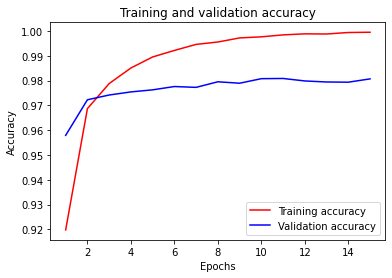

In [ ]:
# show what the predictions look like for a multi-class classification problem
# pretty!

# learning curve
import matplotlib.pyplot as plt

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how the model did!
preds = network.predict(test_images)
preds # if you look at preds, there's actually a probability in there...

# here it is! almost a perfect prediction
# actual is left, predicted is top
# names can be found by inspecting Y
matrix = confusion_matrix(test_labels.argmax(axis=1), preds.argmax(axis=1))
matrix

array([[ 971,    0,    1,    0,    1,    1,    3,    1,    2,    0],
       [   0, 1129,    2,    0,    0,    1,    2,    0,    1,    0],
       [   3,    0, 1007,    6,    3,    0,    2,    4,    7,    0],
       [   1,    0,    0,  997,    0,    5,    0,    2,    1,    4],
       [   1,    0,    1,    1,  963,    0,    3,    3,    2,    8],
       [   2,    0,    0,    7,    1,  876,    2,    0,    2,    2],
       [   3,    3,    1,    1,    3,    3,  944,    0,    0,    0],
       [   1,    4,    8,    4,    0,    0,    0, 1000,    3,    8],
       [   2,    1,    3,    5,    3,    4,    1,    2,  948,    5],
       [   2,    3,    0,    4,    5,    5,    0,    3,    3,  984]])

In [ ]:
print(classification_report(test_labels.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# Try a Baseline Model for Fun
Just to show the power on DNNs, why not try a more familiar model like logistic regression? Because it's less accurate and actually takes MORE time!

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=100000000)

# warning: takes a long time to fit!

# had to make a copy of the labels because it expects a 1D array,
# not like the previous to_categorical() we used.
clf = LR.fit(train_images, # X
             copy_train_labels) # y (stored in original 5, 6, 7, 9 format... original labels)

In [ ]:
# evaluate confusion matrix
preds = clf.predict(test_images)

confusion_matrix(copy_test_labels, preds)

array([[ 955,    0,    2,    4,    1,   10,    4,    3,    1,    0],
       [   0, 1110,    5,    2,    0,    2,    3,    2,   11,    0],
       [   6,    9,  930,   14,   10,    3,   12,   10,   34,    4],
       [   4,    1,   16,  925,    1,   23,    2,   10,   19,    9],
       [   1,    3,    7,    3,  921,    0,    6,    5,    6,   30],
       [   9,    2,    3,   35,   10,  777,   15,    6,   31,    4],
       [   8,    3,    8,    2,    6,   16,  912,    2,    1,    0],
       [   1,    7,   23,    7,    6,    1,    0,  947,    4,   32],
       [   9,   11,    6,   22,    7,   29,   13,   10,  855,   12],
       [   9,    8,    1,    9,   21,    7,    0,   21,    9,  924]])

In [ ]:
# evaluate train results - it does OK,
# but NN does better!

print(classification_report(copy_test_labels, preds))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
# interpret the output!
# what is going on with the number five?
# X is predicted, Y is actual